In [2]:
from sympy import *
from sympy.physics.mechanics import *
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation

Pendulum, $\theta_d(t)=0$

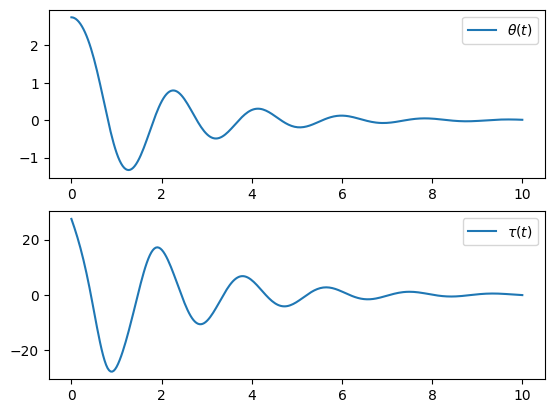

In [2]:
m = 5
l = 1
g = 9.81

Kp = 10
Kd = 5

theta_e_0 = -7*pi/8
theta_e_dot_0 = 0

def ODE(t, y):
    x1, x2 = y
    return (
        x2,
        -(m*g*l*sin(x1) + Kp*x1 + Kd*x2)/(m*l**2)
    )

t_stop = 10
fps = 30
sol = solve_ivp(ODE, (0, t_stop), (theta_e_0, theta_e_dot_0), t_eval=np.linspace(0, t_stop, int(fps*t_stop)))

theta_e_sol, theta_e_dot_sol = sol.y
t = sol.t

theta_sol = -theta_e_sol
theta_dot_sol = -theta_e_dot_sol

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, theta_sol, label=r'$\theta(t)$')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, Kp*theta_sol + Kd*theta_dot_sol, label=r'$\tau(t)$')
plt.legend()
plt.show()

In [3]:
p = lambda th: (l*sin(th), -l*cos(th))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-3, 1), aspect='equal')
ax.grid()

(x_0, y_0) = p(-7*pi/8)
line = ax.plot([0, x_0], [0, y_0], 'o-', lw=2)[0]

def animate(i):
    (x, y) = p(theta_sol[i])
    line.set_data([0, x], [0, y])

ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save(f'control.mp4', writer=ffmpeg_writer)
plt.close(fig)

Pendulum, $\theta_d(t)=\frac{\pi}{4}\sin(\pi t)+\frac{\pi}{8}$

In [4]:
m = 5
l = 1
g = 9.81

Kp = 100
Kd = 50
Ki = 50

theta_d = lambda t: pi/4*sin(pi*t) + pi/8
theta_d_dot = lambda t: pi**2/4*cos(pi*t)
theta_d_ddot = lambda t: -pi**3/4*sin(pi*t)
theta_d_dddot = lambda t: -pi**4/4*cos(pi*t)

theta_0 = -7*pi/8
theta_dot_0 = 0
theta_ddot_0 = 0

theta_e_0 = theta_d(0) - theta_0
theta_e_dot_0 = theta_d_dot(0) - theta_dot_0
theta_e_ddot_0 = theta_d_ddot(0) - theta_ddot_0

def ODE(t, y):
    x1, x2, x3 = y
    return (
        x2,
        x3,
        (m*l**2*pi**4/4*cos(pi*t) - (theta_d_dot(t)-x2)*m*g*l*cos(theta_d(t)-x1) + Kp*x2 + Kd*x3 + Ki*x1)/(-m*l**2)
    )

t_stop = 20
fps = 30
sol = solve_ivp(ODE, (0, t_stop), (theta_e_0, theta_e_dot_0, theta_e_ddot_0), t_eval=np.linspace(0, t_stop, int(fps*t_stop)))

In [5]:
theta_e_sol, theta_e_dot_sol, theta_e_ddot_sol = sol.y
t = sol.t

theta_d_sol = np.array([theta_d(ti) for ti in t])
theta_d_dot_sol = np.array([theta_d_dot(ti) for ti in t])
theta_d_ddot_sol = np.array([theta_d_ddot(ti) for ti in t])

theta_sol = theta_d_sol - theta_e_sol
theta_dot_sol = theta_d_dot_sol - theta_e_dot_sol
theta_ddot_sol = theta_d_ddot_sol - theta_e_ddot_sol

tau_sol = -m*l**2*(theta_e_ddot_sol+np.pi**3/4*np.sin(np.pi*t)) + m*g*l*np.sin(np.pi/4*np.sin(np.pi*t)-theta_e_sol)
#tau_sol = m*l**2*theta_ddot_sol + m*g*l*np.sin(theta_sol)
#tau_sol = Kp*theta_e_sol + Kd*theta_e_dot_sol + Ki*np.trapz(theta_e_sol, x=t)

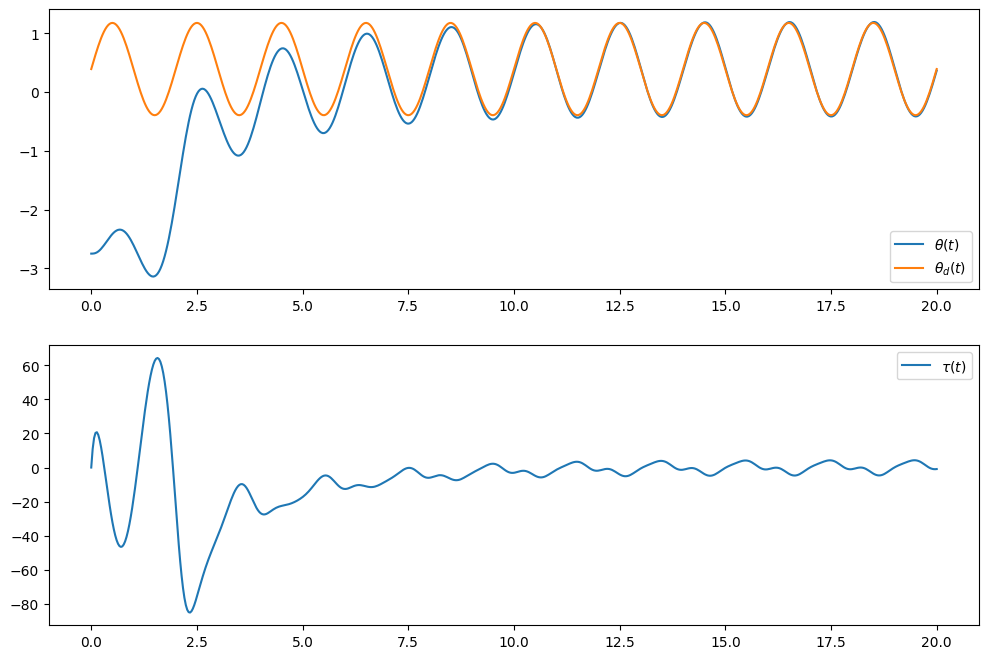

In [6]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, theta_sol, label=r'$\theta(t)$')
plt.plot(t, theta_d_sol, label=r'$\theta_d(t)$')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, tau_sol, label=r'$\tau(t)$')
plt.legend()
plt.show()

In [7]:
p = lambda th: (l*sin(th), -l*cos(th))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-3, 1), aspect='equal')
ax.grid()

(x_0, y_0) = p(theta_0)
line = ax.plot([0, x_0], [0, y_0], 'o-', lw=2)[0]

(x_d_1, y_d_1) = p(-np.pi/8)
(x_d_2, y_d_2) = p(3*np.pi/8)
ax.plot([x_d_1, 0, x_d_2], [y_d_1, 0, y_d_2], 'k--', lw=1)[0]

text = ax.text(0.05, 0.9, f'time: {t[0]:.1f} s\ntau: {tau_sol[0]:.1f} Nm', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

def animate(i):
    (x, y) = p(theta_sol[i])
    line.set_data([0, x], [0, y])
    text.set_text(f'time: {t[i]:.1f} s\ntau: {tau_sol[i]:.1f} Nm')

ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save(f'control_sine.mp4', writer=ffmpeg_writer)
plt.close(fig)

Pendulum, $\theta_d(t)=\begin{bmatrix}
    *\\\frac{\pi}{4}\sin(\pi t)+\frac{\pi}{8}\end{bmatrix}$

In [16]:
m1 = 3
m2 = 5
l = 1
g = 9.81

Kp = 100
Kd = 50
Ki = 50

theta_d = lambda t: pi/4*sin(pi*t) + pi/8
theta_d_dot = lambda t: pi**2/4*cos(pi*t)
theta_d_ddot = lambda t: -pi**3/4*sin(pi*t)
theta_d_dddot = lambda t: -pi**4/4*cos(pi*t)

theta_0 = np.array([[0], [0]])
theta_dot_0 = np.array([[0], [0]])
theta_ddot_0 = np.array([[0], [0]])

theta_e_0 = theta_d(0) - theta_0[0][0]
theta_e_dot_0 = theta_d_dot(0) - theta_dot_0[0][0]
theta_e_ddot_0 = theta_d_ddot(0) - theta_ddot_0[0][0]

def ODE(t, y):
    x1, x2, x3 = y
    return (
        x2,
        x3,
        (
        m2*l*(-cos(theta_d(t)-x1)*theta_d_dddot(t)-(theta_d_dot(t)-x2)*sin(theta_d(t)-x1)*theta_d_ddot(t)) + (m1+m2)*g*sec(theta_d(t)-x1)**2*(theta_d_dot(t)-x2) + m2*l*((theta_d_dot(t)-x2)**2*cos(theta_d(t)-x1)+(theta_d_ddot(t)-x3)*sin(theta_d(t)-x1)) + Kp*x2 + Kd*x3 + Ki*x1
        - x3*(theta_d_dot(t)-x2)*((m1+m2)*l*sec(theta_d(t)-x1)*tan(theta_d(t)-x1) + m2*l*sin(theta_d(t)-x1))
        ) / ((m1+m2)*l/cos(theta_d(t)-x1)-m2*l*cos(theta_d(t)-x1))
    )

t_stop = 60
fps = 30
sol = solve_ivp(ODE, (0, t_stop), (theta_e_0, theta_e_dot_0, theta_e_ddot_0), t_eval=np.linspace(0, t_stop, int(fps*t_stop)))

In [ ]:
theta_e_sol, theta_e_dot_sol, theta_e_ddot_sol = sol.y
t = sol.t

theta_d_sol = np.array([theta_d(ti) for ti in t])
theta_d_dot_sol = np.array([theta_d_dot(ti) for ti in t])
theta_d_ddot_sol = np.array([theta_d_ddot(ti) for ti in t])

theta_sol = theta_d_sol - theta_e_sol
theta_dot_sol = theta_d_dot_sol - theta_e_dot_sol
theta_ddot_sol = theta_d_ddot_sol - theta_e_ddot_sol

#tau_sol

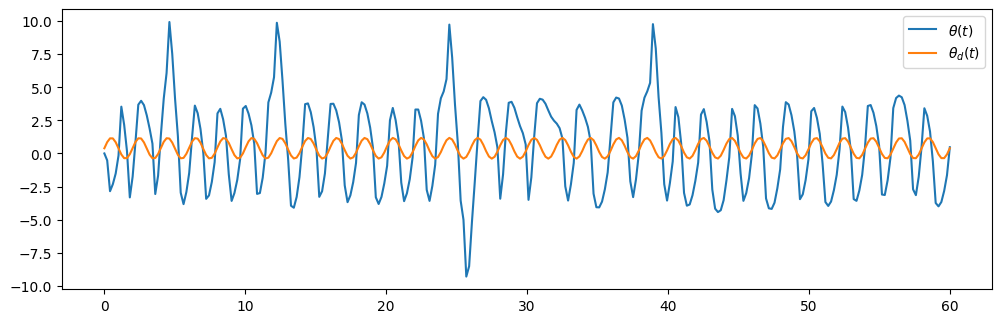

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, theta_sol, label=r'$\theta(t)$')
plt.plot(t, theta_d_sol, label=r'$\theta_d(t)$')
plt.legend()

#plt.subplot(2, 1, 2)
#plt.plot(t, tau_sol, label=r'$\tau(t)$')
#plt.legend()
plt.show()

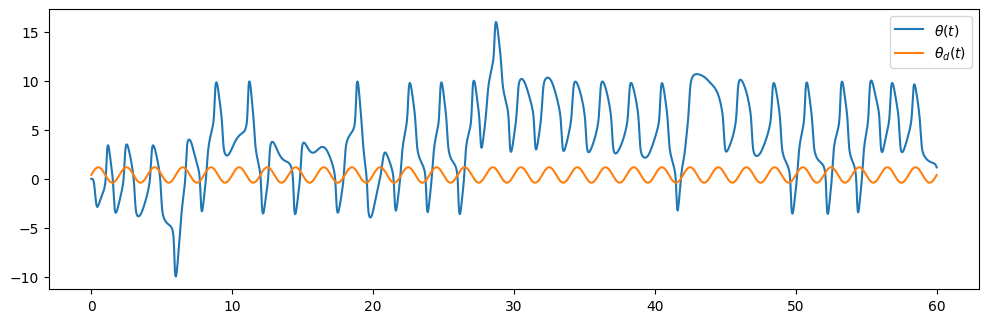

In [4]:
import pandas as pd

data = np.array(pd.read_csv('data_100_50_10.csv'))

t = data[:, 0]
theta_sol = data[:, 1]
theta_d_sol = data[:, 7]

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t, theta_sol, label=r'$\theta(t)$')
plt.plot(t, theta_d_sol, label=r'$\theta_d(t)$')
plt.legend()

#plt.subplot(2, 1, 2)
#plt.plot(t, tau_sol, label=r'$\tau(t)$')
#plt.legend()
plt.show()

In [ ]:
p = lambda th: (l*sin(th), -l*cos(th))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-3, 1), aspect='equal')
ax.grid()

(x_0, y_0) = p(0)
line = ax.plot([0, x_0], [0, y_0], 'o-', lw=2)[0]

(x_d_1, y_d_1) = p(-np.pi/8)
(x_d_2, y_d_2) = p(3*np.pi/8)
ax.plot([x_d_1, 0, x_d_2], [y_d_1, 0, y_d_2], 'k--', lw=1)[0]

#text = ax.text(0.05, 0.9, f'time: {t[0]:.1f} s\ntau: {tau_sol[0]:.1f} Nm', transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))

def animate(i):
    (x, y) = p(theta_sol[i])
    line.set_data([0, x], [0, y])
    #text.set_text(f'time: {t[i]:.1f} s\ntau: {tau_sol[i]:.1f} Nm')

ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=fps)
ani.save(f'control_sine_data.mp4', writer=ffmpeg_writer)
plt.close(fig)